In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

N= 1000000
bit_seq=[random.randint(0,99)%2 for _ in range(N)]
#print(bit_seq)

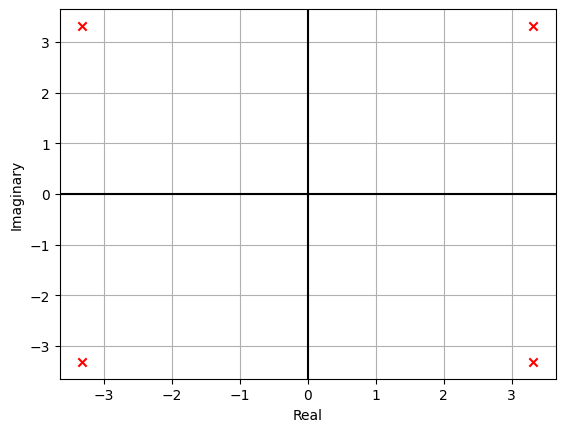

In [2]:
#QPSK:
# normalized
# 00 1+j
# 01 1-j
# 10 -1+j
# 11 -1-j
# sym = sqrt(Eb/2)*(bc+jbs)

Eb = 22
scale = math.sqrt(Eb/2)
sym_seq = []
for i in range(0,N,2):
    if bit_seq[i:i+2] == [0,0]:
        sym_seq.append(scale*(1+1j))
    elif bit_seq[i:i+2] == [0,1]:
        sym_seq.append(scale*(1-1j))
    elif bit_seq[i:i+2] == [1,0]:
        sym_seq.append(scale*(-1+1j))
    else:
        sym_seq.append(scale*(-1-1j))

#defining constellation
constellation = [scale*(1+1j),scale*(1-1j),scale*(-1+1j),scale*(-1-1j)]
x = [ele.real for ele in constellation]
y = [ele.imag for ele in constellation]
plt.scatter(x,y,marker='x',color='r')
plt.ylabel("Imaginary")
plt.xlabel("Real")
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()

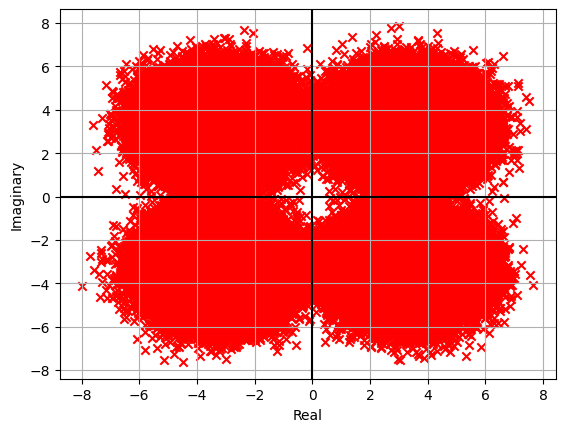

In [3]:
# adding noise wc + jws

rx_seq=[0] * int(N/2)
sigma_c = 1
sigma_s = 1
for i in range(int(N/2)):
    rx_seq[i] = sym_seq[i] + random.gauss(0,sigma_c) + 1j*random.gauss(0,sigma_s)
#print(rx_seq)
x = [ele.real for ele in rx_seq]
y = [ele.imag for ele in rx_seq]
plt.scatter(x,y,marker='x',color='r')
plt.ylabel("Imaginary")
plt.xlabel("Real")
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()

In [4]:
# ML decoding
# check for minimum distance with each possible symbol in constellation

decoded_bit_seq = []
for symbol in rx_seq:
    min_distance  = 100 
    decoded = 0
    for i in range(4):
        distance = (symbol.real - constellation[i].real)**2 + (symbol.imag - constellation[i].imag)**2
        if distance<min_distance:
            min_distance = distance
            decoded = i
    if decoded == 0:
        decoded_bit_seq.extend([0,0])
    elif decoded == 1:
        decoded_bit_seq.extend([0,1])
    elif decoded == 2:
        decoded_bit_seq.extend([1,0])
    else:
        decoded_bit_seq.extend([1,1])

#print(decoded_bit_seq)
        
    

In [5]:
# checking errors

errors = 0
for i in range(N):
    if decoded_bit_seq[i] != bit_seq[i]:
        errors +=1

print(f"number of errors = {errors}")
print(f"probablity of error = {errors/N}")  
print(f"Eb/N0 = {10*math.log(Eb/(2*(sigma_c**2 + sigma_s**2)),10)} (db)")



number of errors = 479
probablity of error = 0.000479
Eb/N0 = 7.4036268949424375 (db)
